In [27]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [3]:
#1
# PRE-PROCESSING
df = pd.read_table("../Data/diagnosis.data", header=None, encoding='utf-16')
df[0] = df[0].str.replace(',', '.').astype(float) # Convert to American standard and to type float
df = df.rename(columns={0: "Temperature", 1: "Nausea", 2: "Lumbar Pain", 3: "Urine Pushing", 4: "Micturition",
                       5: "Urethra", 6: "IB", 7: "NP"})
df = df.replace({'yes': True, 'no': False})

X = df.iloc[:, :6]
y = df.iloc[:, 6:]

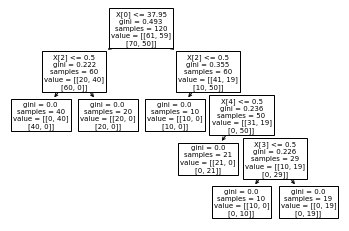

In [4]:
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz 

#b) Decision Tree
dt = DecisionTreeClassifier().fit(X, y)

tree.plot_tree(dt)
plt.show()

##  INTERPRETATION  ##
# [0, 40], [40, 0] => Feature1[no, yes], Feature2[no, yes] => Feature1: yes, Feature2: no

In [5]:
#c) If-Then statements

def tree_to_pseudo(tree, feature_names):

    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth=0):
        indent = "  " * depth
        if (threshold[node] != -2):
            print(indent + "if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
            if left[node] != -1:
                recurse (left, right, threshold, features, left[node], depth+1)
                print(indent + "} else {")
                if right[node] != -1:
                    recurse (left, right, threshold, features, right[node], depth+1)
                print(indent + "}")
        else:
            print(indent + "return " + str(value[node]))

    recurse(left, right, threshold, features, 0)
    
tree_to_pseudo(dt, X.columns)

if ( Temperature <= 37.95000076293945 ) {
  if ( Lumbar Pain <= 0.5 ) {
    return [[ 0. 40.]
 [40.  0.]]
  } else {
    return [[20.  0.]
 [20.  0.]]
  }
} else {
  if ( Lumbar Pain <= 0.5 ) {
    return [[10.  0.]
 [10.  0.]]
  } else {
    if ( Micturition <= 0.5 ) {
      return [[21.  0.]
 [ 0. 21.]]
    } else {
      if ( Urine Pushing <= 0.5 ) {
        return [[10.  0.]
 [ 0. 10.]]
      } else {
        return [[ 0. 19.]
 [ 0. 19.]]
      }
    }
  }
}


In [2]:
#2b) Pre-Processing
df2 = pd.read_table("../Data/communities.data", sep=',', header=None)

# Drop non-predictive features
df2 = df2.iloc[:, 5:]

# Data imputation
# change ? to NA
import numpy as np
df2 = df2.replace({"?": np.nan})
df2 = df2.astype(float)

from sklearn.preprocessing import Imputer
imp = Imputer() # by default, replaces NaN to mean of column
df2 = imp.fit_transform(df2)
df2 = pd.DataFrame(df2)

print(df2)

       0     1     2     3     4     5     6     7     8     9    ...   113  \
0     0.19  0.33  0.02  0.90  0.12  0.17  0.34  0.47  0.29  0.32  ...  0.12   
1     0.00  0.16  0.12  0.74  0.45  0.07  0.26  0.59  0.35  0.27  ...  0.02   
2     0.00  0.42  0.49  0.56  0.17  0.04  0.39  0.47  0.28  0.32  ...  0.01   
3     0.04  0.77  1.00  0.08  0.12  0.10  0.51  0.50  0.34  0.21  ...  0.02   
4     0.01  0.55  0.02  0.95  0.09  0.05  0.38  0.38  0.23  0.36  ...  0.04   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1989  0.01  0.40  0.10  0.87  0.12  0.16  0.43  0.51  0.35  0.30  ...  0.01   
1990  0.05  0.96  0.46  0.28  0.83  0.32  0.69  0.86  0.73  0.14  ...  0.02   
1991  0.16  0.37  0.25  0.69  0.04  0.25  0.35  0.50  0.31  0.54  ...  0.08   
1992  0.08  0.51  0.06  0.87  0.22  0.10  0.58  0.74  0.63  0.41  ...  0.03   
1993  0.20  0.78  0.14  0.46  0.24  0.77  0.50  0.62  0.40  0.17  ...  0.11   

       114   115       116       117       118     

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
# c) Plot Correlation Matrix
corr = df2.corr()
print(corr)

          0         1         2         3         4         5         6    \
0    1.000000 -0.046148  0.231178 -0.300845  0.181603  0.156218  0.006368   
1   -0.046148  1.000000 -0.067109 -0.235907  0.201996  0.468659  0.520461   
2    0.231178 -0.067109  1.000000 -0.794389 -0.106738 -0.066581  0.122338   
3   -0.300845 -0.235907 -0.794389  1.000000 -0.270266 -0.444166 -0.194015   
4    0.181603  0.201996 -0.106738 -0.270266  1.000000  0.266743 -0.025020   
..        ...       ...       ...       ...       ...       ...       ...   
118 -0.061583 -0.006426 -0.082660  0.052940  0.032389  0.024366  0.000652   
119  0.076527 -0.000280  0.010987 -0.033209  0.065424  0.025956  0.011271   
120  0.466352 -0.094368  0.260793 -0.276234  0.101888  0.125353  0.001301   
121 -0.035576 -0.054562  0.022237 -0.006323 -0.011619  0.002234 -0.076589   
122  0.367157 -0.034923  0.631264 -0.684770  0.037622  0.293050  0.060477   

          7         8         9    ...       113       114       115  \
0  

In [48]:
# d) Coefficient of Variation of Each Feature
from scipy.stats import variation
from statistics import variance

cv = df2.apply(variation)

print(cv)

0      2.202950
1      0.353210
2      1.410567
3      0.323700
4      1.358821
         ...   
118    0.122301
119    0.367948
120    2.554625
121    0.337196
122    0.978769
Length: 123, dtype: float64


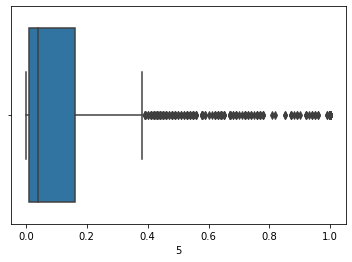

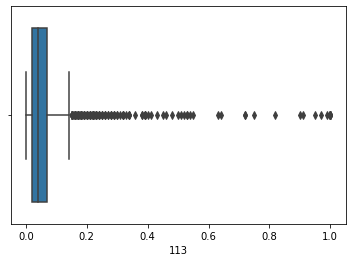

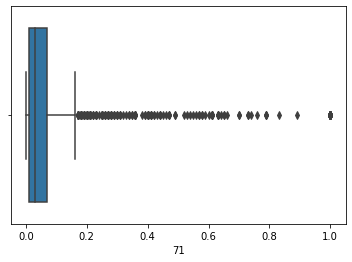

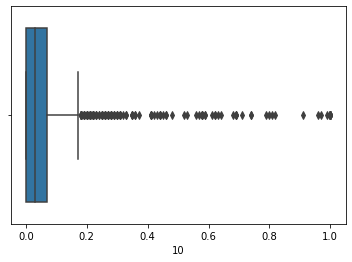

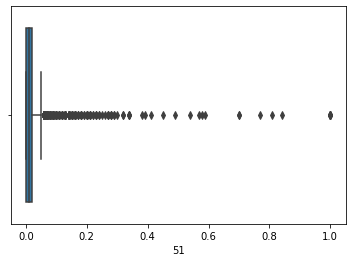

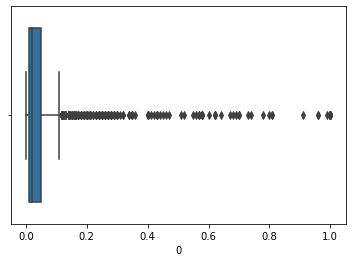

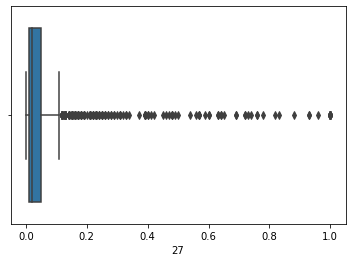

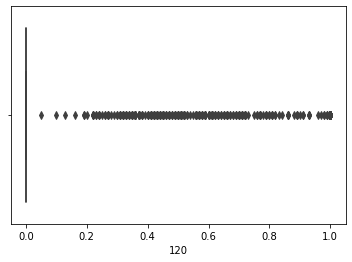

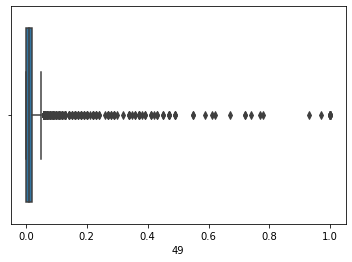

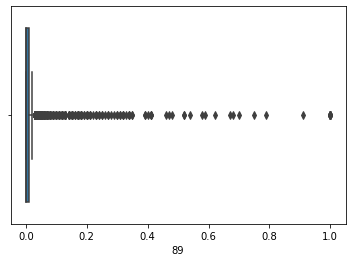

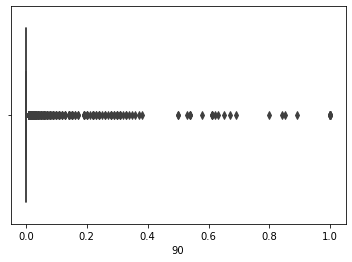

In [29]:
# e) part ii. Boxplot of 11 highest CV variables
a = ind.tolist()
for i in a:
    plt.figure(i)
    h = sns.boxplot(df2.iloc[:, i])

In [9]:
# MAKE Test/Train set

train_set = df2[:1495]
test_set = df2[1495:]
X_train = df2.iloc[:1495, :122]
y_train = df2.iloc[:1495, 122]
X_test = df2.iloc[1495:, :122]
y_test = df2.iloc[1495:, 122]

#1f) Vanilla linear regression
lr = LinearRegression().fit(X_train, y_train)
prediction = lr.predict(X_test)
r2 = lr.score(X_test, y_test)

print("Test Accuracy (R^2): " + str(r2))
print("Test Error: " + str(1-r2))
# a negative R^2 signifies a particularly bad model

0.7897255274336176
0.0475553005811221
Test Accuracy (R^2): -15.606466950754836
Test Error: 16.606466950754836


In [21]:
# 1g) Ridge regression, lambda determined by 5-fold cross-validation
ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3], cv = 5).fit(X_train, y_train)

r2 = ridge.score(X_test, y_test)
print("Test Accuracy (R^2): " + str(r2))
print("Test Error: " + str(1-r2))

Test Accuracy (R^2): 0.627021995706937
Test Error: 0.37297800429306305


In [49]:
#2h LASSO
# unstandardized lasso
lasso = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3], cv = 5, tol=0.1)
lasso2 = lasso.fit(X_train, y_train)

r2 = lasso2.score(X_test, y_test)
print("Test Accuracy (R^2): " + str(r2))
print("Test Error: " + str(1-r2))

# Feature selection from unstandardized
select = SelectFromModel(lasso).fit(X_train, y_train)
var = select.get_support()
var2 = np.argwhere(var)
print("Significant Features: ")
for i in range(var2.size):
    print(var2[i, 0])

Test Accuracy (R^2): 0.6282207239056727
Test Error: 0.37177927609432726
Significant Features: 
2
3
7
11
17
18
24
30
38
43
44
48
50
58
59
62
68
71
72
74
84
86
88
90
92
119
120


In [43]:
# standardized lasso (WEIRD)
X_tr_std = preprocessing.scale(X_train)
y_tr_std = preprocessing.scale(y_train)
X_te_std = preprocessing.scale(X_test)
y_te_std = preprocessing.scale(y_test)
lasso_new = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3], cv = 5, tol=0.1).fit(X_tr_std, y_tr_std)

r2 = lasso_new.score(X_te_std, y_te_std)
print("Test Accuracy (R^2): " + str(r2))
print("Test Error: " + str(1-r2))

# Significant test error, meaning standardization is poorly affecting the already-normalized dataset

Test Accuracy (R^2): 0.6338843682278376
Test Error: 0.36611563177216244


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

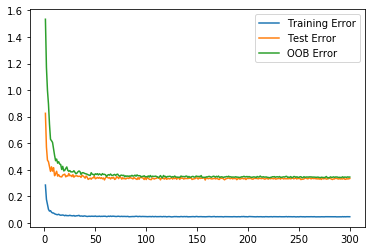

In [30]:
#2i) RANDOM FOREST
B = np.linspace(1, 300, 300)

# using m = sqrt(122)
train_error = []
test_error = []
oob_error = []
for i in B:
    rfr = RandomForestRegressor(n_estimators = int(i), max_features = 'sqrt',
                               oob_score = True).fit(X_train, y_train)
    # Test error
    te = 1 - rfr.score(X_test, y_test)
    test_error.append(te)

    # OOB Error
    oob = 1 - rfr.oob_score_
    oob_error.append(oob)

    # Training error
    tr = 1 - rfr.score(X_train, y_train)
    train_error.append(tr)

plt.plot(B, train_error, label='Training Error')
plt.plot(B, test_error, label='Test Error')
plt.plot(B, oob_error, label='OOB Error')
plt.legend()

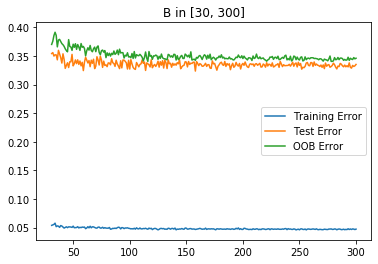

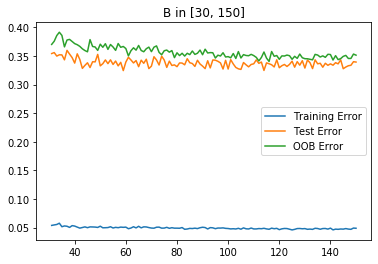

In [34]:
# Cutting this off because before 30 the errors for OOB are crazy/unrepresentative
plt.figure(1)
plt.title("B in [30, 300]")
plt.plot(B[30:], train_error[30:], label='Training Error')
plt.plot(B[30:], test_error[30:], label='Test Error')
plt.plot(B[30:], oob_error[30:], label='OOB Error')
plt.legend()

plt.figure(2)
plt.title("B in [30, 150]")
plt.plot(B[30:150], train_error[30:150], label='Training Error')
plt.plot(B[30:150], test_error[30:150], label='Test Error')
plt.plot(B[30:150], oob_error[30:150], label='OOB Error')
plt.legend()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

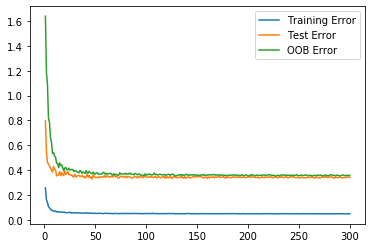

In [36]:
B = np.linspace(1, 300, 300)
# using m = 122
train_error2 = []
test_error2 = []
oob_error2 = []
for i in B:
    rfr = RandomForestRegressor(n_estimators = int(i), max_features = 122,
                               oob_score = True).fit(X_train, y_train)
    # Test error
    te = 1 - rfr.score(X_test, y_test)
    test_error2.append(te)

    # OOB Error
    oob = 1 - rfr.oob_score_
    oob_error2.append(oob)

    # Training error
    tr = 1 - rfr.score(X_train, y_train)
    train_error2.append(tr)

plt.plot(B, train_error2, label='Training Error')
plt.plot(B, test_error2, label='Test Error')
plt.plot(B, oob_error2, label='OOB Error')
plt.legend()

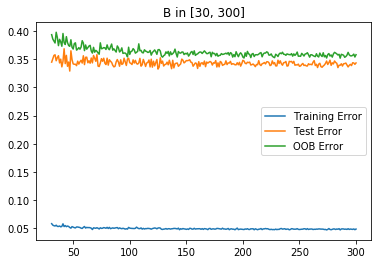

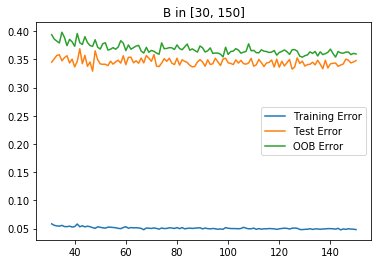

In [37]:
# Cutting this off because before 30 the errors for OOB are crazy/unrepresentative
plt.figure(1)
plt.title("B in [30, 300]")
plt.plot(B[30:], train_error2[30:], label='Training Error')
plt.plot(B[30:], test_error2[30:], label='Test Error')
plt.plot(B[30:], oob_error2[30:], label='OOB Error')
plt.legend()

plt.figure(2)
plt.title("B in [30, 150]")
plt.plot(B[30:150], train_error2[30:150], label='Training Error')
plt.plot(B[30:150], test_error2[30:150], label='Test Error')
plt.plot(B[30:150], oob_error2[30:150], label='OOB Error')
plt.legend()

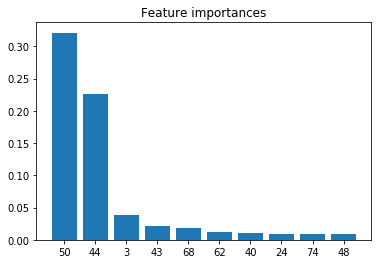

In [51]:
importances = rfr.feature_importances_
std = np.std([rfr.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices[:10]])
plt.xticks(range(10), indices[:10])
plt.show()

Feature ranking:
1. feature 44 (0.083451)
2. feature 50 (0.069327)
3. feature 43 (0.063665)
4. feature 3 (0.056047)
5. feature 49 (0.044764)
6. feature 2 (0.038502)
7. feature 46 (0.031022)
8. feature 15 (0.029425)
9. feature 17 (0.026475)
10. feature 45 (0.024829)
11. feature 68 (0.023346)
12. feature 41 (0.021501)
13. feature 40 (0.019162)
14. feature 27 (0.015555)
15. feature 62 (0.015388)
16. feature 28 (0.015292)
17. feature 38 (0.013866)
18. feature 67 (0.011024)
19. feature 30 (0.010646)
20. feature 71 (0.010433)
21. feature 69 (0.010281)
22. feature 74 (0.009451)
23. feature 32 (0.008732)
24. feature 90 (0.008098)
25. feature 5 (0.006942)
26. feature 19 (0.006923)
27. feature 77 (0.006841)
28. feature 73 (0.006517)
29. feature 115 (0.006071)
30. feature 29 (0.005804)
31. feature 61 (0.005684)
32. feature 24 (0.005622)
33. feature 72 (0.005432)
34. feature 63 (0.005409)
35. feature 0 (0.005235)
36. feature 60 (0.004911)
37. feature 47 (0.004818)
38. feature 86 (0.004785)
39. fea

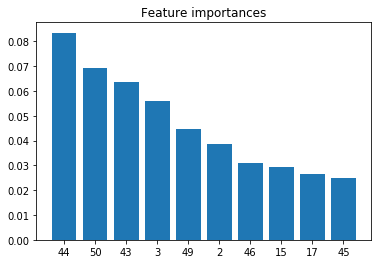

In [35]:
# Another feature importance graph for another randomforest. All
# of them are going to be different with different parameters
importances = rfr.feature_importances_
std = np.std([rfr.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices[:10]])
plt.xticks(range(10), indices[:10])
plt.show()